In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model

In [2]:
df = pd.read_csv("indian-population-growth.csv")
df

,Year,Population
0,1961,459.64 M
1,1962,469.08 M
2,1963,478.83 M
3,1964,488.85 M
4,1965,499.12 M
...,...,...
56,2017,"1,338.68 M"
57,2018,"1,352.64 M"
58,2019,"1,366.42 M"
59,2020,"1,380.00 M"


In [3]:
df['Population'] = df['Population'].str.replace('M', '')
df['Population'] = df['Population'].str.replace(',', '')
df['Population'] = df['Population'].str.strip()
df['Population'] = pd.to_numeric(df['Population'], errors = 'coerce')
df

,Year,Population
0,1961,459.64
1,1962,469.08
2,1963,478.83
3,1964,488.85
4,1965,499.12
...,...,...
56,2017,1338.68
57,2018,1352.64
58,2019,1366.42
59,2020,1380.00


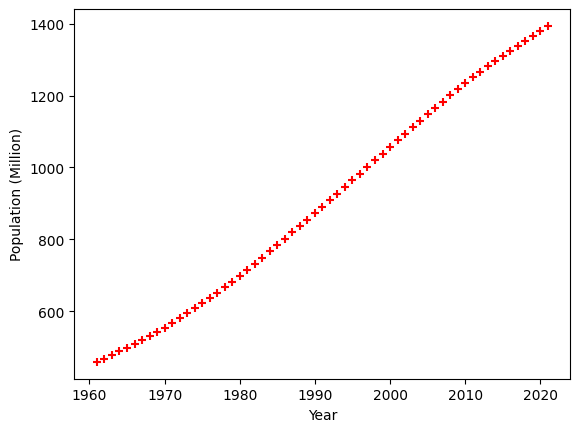

In [4]:
%matplotlib inline
plt.xlabel('Year')
plt.ylabel('Population (Million)')
plt.scatter(df.Year, df.Population, color = 'red', marker = '+')

In [5]:
X = df[['Year']]
Y = df['Population']

In [6]:
reg = linear_model.LinearRegression()
reg.fit(X, Y)

LinearRegression()

In [7]:
reg.predict([[2024]])

/home/sumit/jupyter-env/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([1450.4441285])

In [8]:
reg.predict([[2022], [2023], [2024], [2025]])

/home/sumit/jupyter-env/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([1417.34031148, 1433.89221999, 1450.4441285 , 1466.99603702])

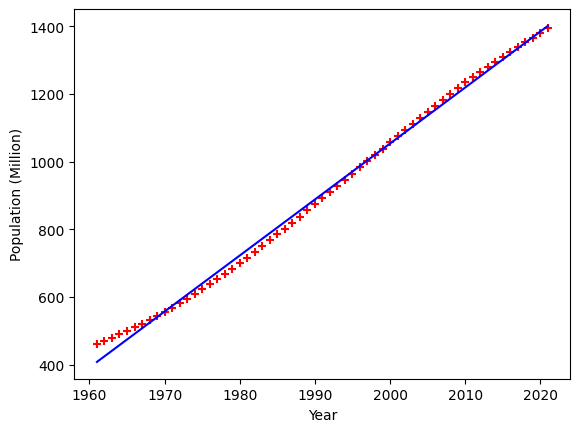

In [9]:
%matplotlib inline
plt.xlabel('Year')
plt.ylabel('Population (Million)')
plt.scatter(df.Year, df.Population, color = 'red', marker = '+')
plt.plot(df.Year, reg.predict(df[['Year']]), color = 'blue')

In [10]:
future_years = pd.DataFrame({'Year': [2022, 2023, 2024, 2025, 2026, 2027, 2028, 2029, 2030]})
predicted_population = reg.predict(future_years)

In [11]:
future_df = pd.DataFrame({'Year': future_years['Year'], 'Population': predicted_population.flatten()})
df = pd.concat([df, future_df], ignore_index=True)

In [12]:
df.tail(10)

,Year,Population
60,2021,1393.410000
61,2022,1417.340311
62,2023,1433.892220
63,2024,1450.444129
64,2025,1466.996037
65,2026,1483.547946
66,2027,1500.099854
67,2028,1516.651763
68,2029,1533.203671
69,2030,1549.755580


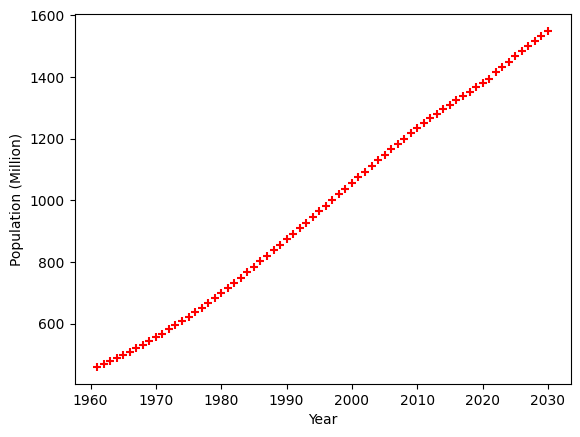

In [13]:
%matplotlib inline
plt.xlabel('Year')
plt.ylabel('Population (Million)')
plt.scatter(df.Year, df.Population, color = 'red', marker = '+')